In [1]:
###Multi-Class Classification
#Intro to Iris DataSet
#Intro to MultiClass Classification
#Data Formatting
#Data Visualization Analysis
#Multi-Class Classif with Sci Kit Learn
#Explanation of K Nearest Neighbors
#K Nearest Neighbors with Sci Kit Learn
#Conclusion

In [1]:
#Utilize SciKitLearn to implement One vs All (or 1vsRest)

In [2]:
#Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
#Set X & Y for Log later on.
X = iris.data
Y = iris.target

In [6]:
#Quick look at Iris dataset description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [9]:
iris_target = DataFrame(Y,columns=['Species'])

In [10]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [11]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [12]:
#Zeros ones and twos.. Need to rename them!!!
#Looking at target data helps to give names
#SciKit Learn documentation*
#Split, Apply, Combine

def flower(num):
    if num == 0:
        return 'Setosa'
    if num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [14]:
#Time to apply the flower function to Iris_Targets['Species']

iris_target['Species'] = iris_target['Species'].apply(flower)

In [15]:
#That worked well.
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [17]:
#Time to combine the dataframes to do data visualization
#Want to join along columns, must set axis=1
iris = pd.concat([iris_data, iris_target],axis=1)

In [18]:
#Looks good..
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


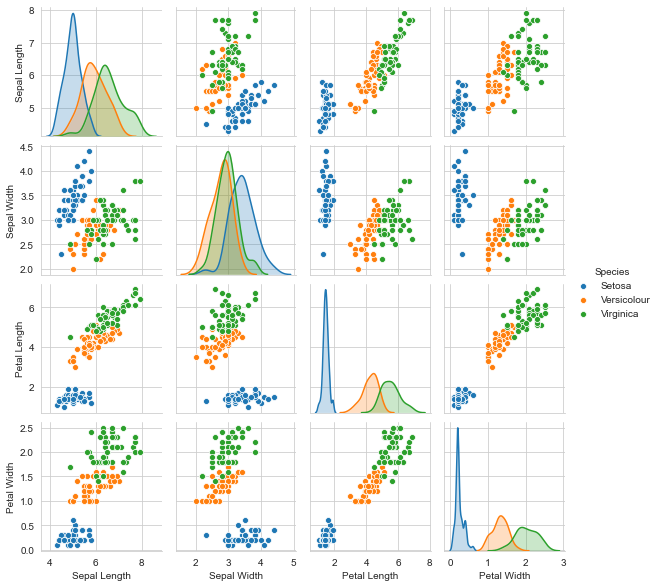

In [20]:
#Let's see it in a brief countplot or histogram..
#Size has been renamed to height accordingly.

#Quick observation shows that Satosa is distinct from other two species
#Blue group is seperated on many variables

sns.pairplot(iris,hue='Species',height=2)

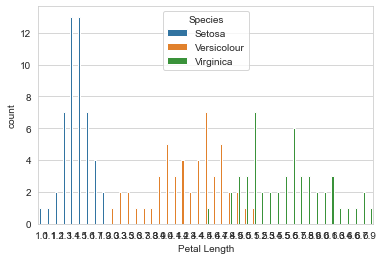

In [47]:
#Let's try a histogram on petal length

sns.countplot('Petal Length',data=iris, hue='Species')

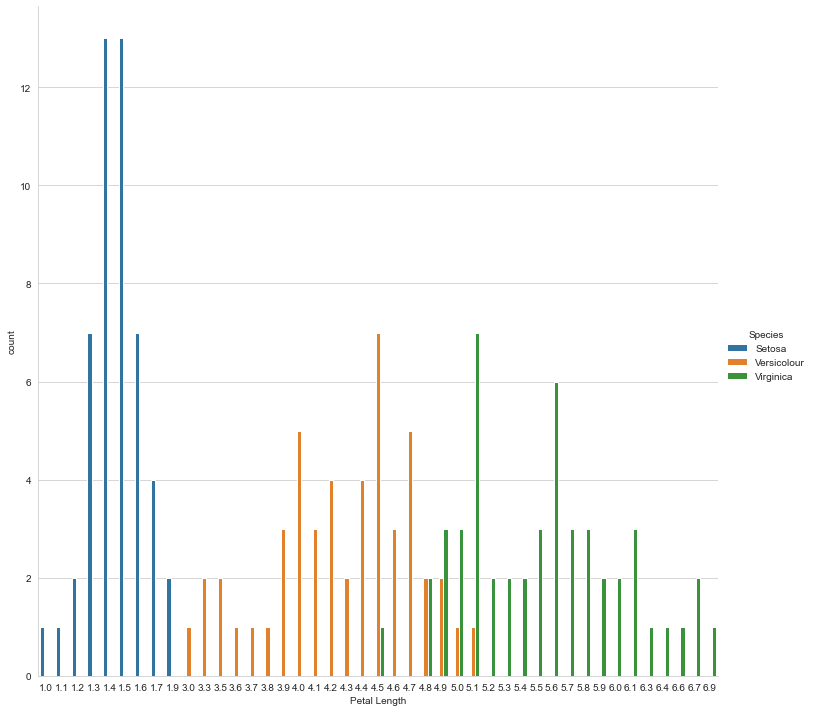

In [56]:
#Messing with different plots/graphs, this looks a bit better..
#We're getting there.
g = sns.catplot(x="Petal Length", hue="Species",
                data=iris, kind="count",
                height=10, aspect=1);

In [64]:
#Part 2 - k Nearest Neighbor
#Import SKLearn modules

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Let's see if we can get rid of the logreg.fit error..
from sklearn.preprocessing import StandardScaler

In [2]:
logreg = LogisticRegression()
scaler = StandardScaler()

#Split data into training and testing datasets
#Adding Arguments-- other than X & Y
#TestSize, default is usually 30%, but we'll make it 40%
#Iniate a randomstate of 3, a seed number for random immersing twister algo

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=3)

NameError: name 'LogisticRegression' is not defined

In [3]:
#Next, we'll train the model with the training data set by fitting the model.

#This error shouldn't be ignored. I must come back to it, after having
#used StandardScaler.. 

logreg.fit(X_train,Y_train, max_iter=10000)

NameError: name 'logreg' is not defined

In [71]:
from sklearn import metrics

In [72]:
#Taking the features (x_test etc.) from the testing set
#and trying to predict the class/target using LogReg.predict on testing set.
#We have our Y test, so we know the correct answers..

#YPred are Predictions given X_Testing Set*
Y_pred = logreg.predict(X_test)

In [73]:
#Must check accuracy of model.
#96.666% accuracy VS the 93% Jose Portilla got. 
#Change could be due to random splitting..
print(metrics.accuracy_score(Y_test,Y_pred))

#Is this trustworthy?
#Let's look at the pairplot (4x4) above...
#Setosa and V colors were well seperated on many features, Setosa much so.
#Can change "test_size" to look at changes in accuracy.

0.9666666666666667


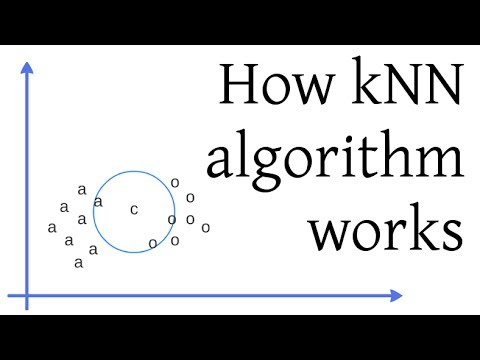

In [80]:
#Maybe we can use K Nearest Neighbors to implement multiclass classification.
#K Nearest Neighbors known as a lazy learning algorithm

#Short Explanation:
from IPython.display import YouTubeVideo
from IPython.display import Image
YouTubeVideo('UqYde-LULfs')

In [75]:
#Given N training vectors, kNN algo identifies the k nearest
#neighbors of 'c', regardless of labels

#Vid 0:00 to 2:30~
#k = 3
#classes 'A' and 'O'
#find class for 'C'
#If K = 3, we need to find the 3 nearest neighbors of C
#Creating a circle around 'C', it has 2 'O' neighbors, and 1 'A'.
#Class of element C is O.

In [76]:
#Vid @ 3:00
#When K = 1, each training vector defines a region in space
#defining a Voronoi pertition of the space
# R of i = {x:d(x,x of i) < d(x, x of i), i != j}

In [77]:
#Vid @ 3:30 - REMARKS
#Choose an odd K value for a 2 class problem
    #Can't have a tie of values :( What's majority class?????#
#K must not be a multiple of the number of classes
    #It's also to avoid ties.
#the main drawback of kNN is the complexity in searching nearest neighbors samples
    #Lots of elements in datasets, to search dist of each elem is problematic.

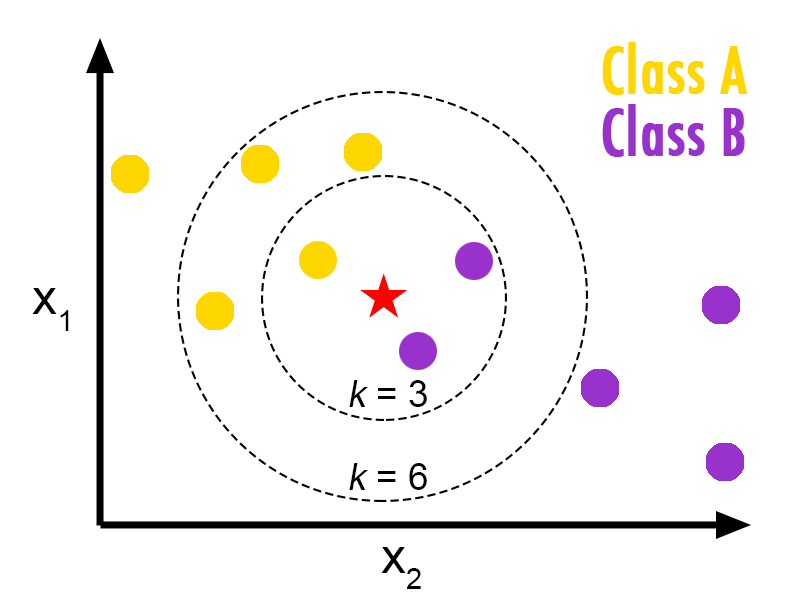

In [81]:
Image('http://bdewilde.github.io/assets/images/2012-10-26-knn-concept.png', width=400, height=300)

In [82]:
#Feature space, X1 X2 --  Two classes in trainingspace: A & B
#Classified point, red star. We define K. At K=3, Star belongs to class B
#But if we change K to 6, K belongs to class A.
#If we did K=10, it'd be a tie, and we'd be in a bad spot.

In [83]:
#LET'S GET BACK TO CODING
#Import Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [84]:
#K value set to 6.
knn = KNeighborsClassifier(n_neighbors = 6)

In [85]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [86]:
#Prediction using diff model, but testing features data.
Y_pred = knn.predict(X_test)

In [87]:
#Print the accuracy of the test against the prediction
#Same accuracy as Jose Portilla, 0.95.
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [88]:
knn = KNeighborsClassifier(n_neighbors=1)

In [89]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [90]:
Y_pred = knn.predict(X_test)

In [120]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [121]:
#How do we know what's the best K to use?
#Since our dataset is relatively small, we can cycle through different K values
k_range = list(range(1,20))

In [122]:
k_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [123]:
accuracy = []

In [124]:
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_prd = knn.predict(X_test)
    #instead of printing accuracy, we're going to append it to the list
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Test Accuracy')

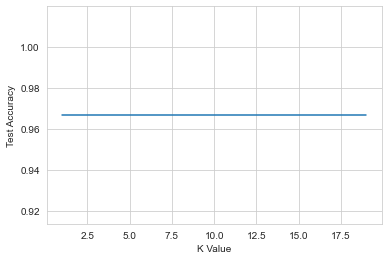

In [125]:
#Let's plot the results using matplotlib
plt.plot(k_range,accuracy)
plt.xlabel('K Value')
plt.ylabel('Test Accuracy')

#The code is sound, but the data is skewed. We should have had
#a different looking graph with varying test accuracy.
#LogReg.fit() on line70~ probably affected this.. 